torch.Size([1, 2, 39, 51])
minmax tensor(0., device='cuda:0', grad_fn=<MinBackward1>) tensor(8.3838, device='cuda:0', grad_fn=<MaxBackward1>)


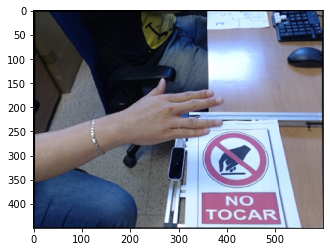

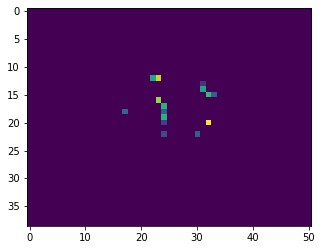

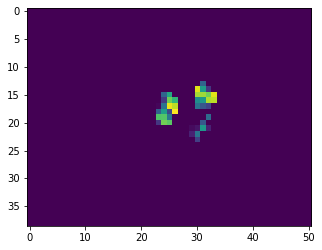

In [105]:
import Nets.GenericNet as IG
import Datasets.HandPoseDataset as HPD
import torch as T
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random
import cv2
import numpy as np
import torch.nn as nn
from PIL import Image

device = T.device("cuda:0" if T.cuda.is_available() else "cpu")
net = IG.GenericNet(IG.PATHS['POSEMACHINE'], device).to(device)
net.load_state_dict(T.load(IG.WEIGHT_PATHS['POSEMACHINE']))
hpd = HPD.HandPoseDatasetHPD(HPD.PATHS['hpd_pose_data'], HPD.PATHS['hpd_images_n'], [(58, 76), (39, 51), (29, 39)], device)
ind = random.randrange(len(hpd))
imgs, hmps = hpd[ind]
op = net(imgs[1].unsqueeze(0).to(device))[-1]
hmps = hmps[1]
hmp_truth = T.zeros(39, 51).to(device)
for i in range(hmps.size(0)):
    hmp_truth[:,:] += hmps[i,:,:]
hmp_truth[hmp_truth<5] = 0

print(op.shape)
heat = T.zeros(op.size(2), op.size(3)).to(device)
m = op[0,:,:].max()
op[op<3]=0
for i in range(2):
    op[op<0] = 0
    heat += op[0,i]
print('minmax', heat[:,:].min(), heat[:,:].max())
to_pil = transforms.ToPILImage()
ops = []
for i in range(2):
    ops.append(to_pil(op[0,i].cpu()))
heat = to_pil(heat.cpu())
hmp_truth = to_pil(hmp_truth.cpu())
axes = []
for i in range(3):
    axes.append(plt.subplots(1, 1)[-1])
imgs = [transforms.ToPILImage()(imgs[0].cpu()),hmp_truth, heat, ops[0]]
for i, ax in enumerate(axes):
    ax.imshow(imgs[i])

torch.Size([3, 240, 320])
torch.Size([1, 4, 7, 10])


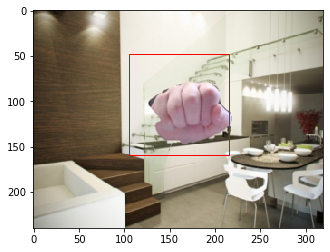

In [120]:
# HAND DETECTOR testing

import Nets.GenericNet as IG
import Datasets.HandPoseDataset as HPD
import torch as T
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import cv2
import numpy as np
import torch.nn as nn
from PIL import Image

device = T.device("cuda:0" if T.cuda.is_available() else "cpu")

net = IG.GenericNet(IG.PATHS['HANDDETECTOR'], device).to(device)
net.load_state_dict(T.load(IG.WEIGHT_PATHS['HANDDETECTOR']))

scales = [1.5, 1.0, 0.75, 0.5]
db = HPD.HandBoundingBoxDataset(HPD.PATHS['hpd_bbox_data'], HPD.PATHS['hpd_images'], scales, device)
ind = random.randrange(0, len(db))
imgs, box = db[ind]
print(imgs[3].size())
op = net(imgs[3].unsqueeze(0))[0]
print(op.shape)
img = transforms.ToPILImage()(imgs[3].cpu())
thres = 0.35
row, col = 0, 0
m = 0
for r in range(op.size(2)):
    for c in range(op.size(3)):
        if op[0, 0, r, c] > m:
            m = max(op[0, 0, r, c], m)
            row, col = r, c
x = (col / op.size(3)) * imgs[3].size()[2]
y = (row / op.size(2)) * imgs[3].size()[1]
w = (op[0, 3, row, col] * imgs[3].size()[1]) / 10
rect = patches.Rectangle((x - w // 2, y - w // 2), w, w, edgecolor='r', linewidth=1, facecolor='none')
fig, ax = plt.subplots(1)
ax.imshow(img)
ax.add_patch(rect)
plt.show()

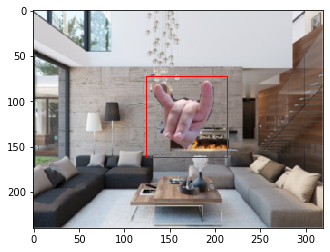

In [21]:
# Bounding box dataset testing

import Nets.GenericNet as IG
import Datasets.HandPoseDataset as HPD
import torch as T
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import cv2
import numpy as np
import torch.nn as nn
from PIL import Image

device = T.device("cuda:0" if T.cuda.is_available() else "cpu")

scales = [1.5, 1.0, 0.75, 0.5]
db = HPD.HandBoundingBoxDataset(HPD.PATHS['hpd_bbox_data'], HPD.PATHS['hpd_images'], scales, device)

ind = random.randrange(0, len(db))
imgs, box = db[ind]
img = transforms.ToPILImage()(imgs[3].cpu())
box[0] *= img.size[0]
box[1] *= img.size[1]
box[2] *= img.size[1]
rect = patches.Rectangle((box[0] - box[2] // 2, box[1] - box[2] // 2), box[2], box[2], edgecolor='r', linewidth=1, facecolor='none')
fig, ax = plt.subplots(1)
ax.imshow(img)
ax.add_patch(rect)
plt.show()
# plt.imshow(img)

torch.Size([1, 2, 61, 81])
minmax tensor(0., device='cuda:0', grad_fn=<MinBackward1>) tensor(10.8408, device='cuda:0', grad_fn=<MaxBackward1>)


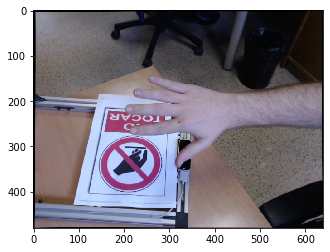

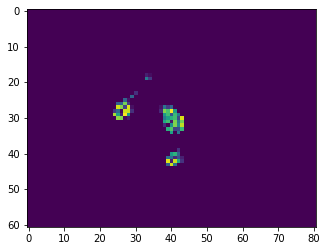

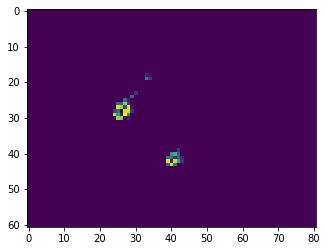

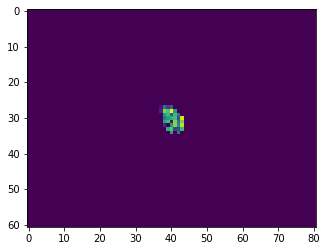

In [29]:
import Nets.GenericNet as IG
import Datasets.HandPoseDataset as HPD
import torch as T
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random
import cv2
import numpy as np
import torch.nn as nn
from PIL import Image

device = T.device("cuda:0" if T.cuda.is_available() else "cpu")
# net = IG.GenericNet(IG.PATHS['POSEMACHINE'], device).to(device)
# net.load_state_dict(T.load(IG.WEIGHT_PATHS['POSEMACHINE']))
loc = 'D:/projects/GestureRecognition/Data/GestureDataset/1/'
img = Image.open(loc + 'e.jpg')
# img = transforms.Resize((int(img.size[1] / 4), int(img.size[0] / 4)))(img)
img = transforms.ToTensor()(img)
op = net(img.unsqueeze(0).to(device))[-1]
print(op.shape)
heat = T.zeros(op.size(2), op.size(3)).to(device)
m = op[0,:,:].max()
op[op<3]=0
for i in range(2):
    heat += op[0,i]
print('minmax', heat[:,:].min(), heat[:,:].max())
to_pil = transforms.ToPILImage()
ops = []
for i in range(2):
    ops.append(to_pil(op[0,i].cpu()))
heat = to_pil(heat.cpu())
axes = []
for i in range(4):
    axes.append(plt.subplots(1, 1)[-1])
imgs = [transforms.ToPILImage()(img.cpu()), heat, *ops]
for i, ax in enumerate(axes):
    ax.imshow(imgs[i])
heat.save(loc + '5.bmp')

In [3]:
img, box = train_set[random.randint(0, 40000)]
img = img.to('cpu')
t = transforms.Compose([transforms.ToPILImage()])
img = t(img.transpose(1, 2))
fig, ax = plt.subplots(1)
ax.imshow(img)
rect = patches.Rectangle((box[0] - box[2] / 2, box[1] - box[3]/2), box[2], box[3],linewidth=2,edgecolor='b',facecolor='none')
ax.add_patch(rect)
plt.show()


ValueError: too many values to unpack (expected 2)

torch.Size([1, 6, 26, 19])
6 4
tensor([ 0.7152,  0.7389, 99.8202, 82.4630, 76.0640, 76.5033], device='cuda:0',
       grad_fn=<AsStridedBackward>)
tensor([214.8873, 151.6450, 199.6404, 164.9259,  76.0640,  76.5033],
       device='cuda:0', grad_fn=<AsStridedBackward>)
6 13
tensor([ 0.5929,  0.6044, 79.0501, 67.6812, 72.1054, 73.2420], device='cuda:0',
       grad_fn=<AsStridedBackward>)
tensor([210.9712, 435.3411, 158.1003, 135.3624,  72.1054,  73.2420],
       device='cuda:0', grad_fn=<AsStridedBackward>)
7 4
tensor([ 0.5230,  0.5508, 75.7559, 61.5579, 49.0924, 49.0116], device='cuda:0',
       grad_fn=<AsStridedBackward>)
tensor([240.7368, 145.6248, 151.5117, 123.1158,  49.0924,  49.0116],
       device='cuda:0', grad_fn=<AsStridedBackward>)
18 4
tensor([ 0.3258,  0.3280, 42.3811, 36.7924, 41.3860, 42.0986], device='cuda:0',
       grad_fn=<AsStridedBackward>)
tensor([586.4258, 138.4964,  84.7623,  73.5848,  41.3860,  42.0986],
       device='cuda:0', grad_fn=<AsStridedBackward>)
19 

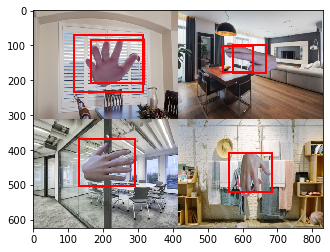

In [8]:
img, bx, by, ret = train_set[random.randint(0, 40000)]
img = img.unsqueeze(0)
preds = model(img, True)
img = img[0].to('cpu')
t = transforms.Compose([transforms.ToPILImage()])
img = t(img.transpose(1, 2))
fig, ax = plt.subplots(1)
ax.imshow(img)
# print(ret)
# print(preds[0,:,5])
# print(bx, by)
# box = preds[0,:, bx, by].clone().detach()
# box[:2] /= 100
# print(box)
# box[0] += bx
# box[1] += by
# box[:2] *= 32
# box[2:4] *= 2
# print(box)
# rect = patches.Rectangle((box[0] - box[2]/2, box[1] - box[3]/2), box[2], box[3],linewidth=2,edgecolor='b',facecolor='none')
# ax.add_patch(rect)
print(preds.shape)
for i in range(26):
    for j in range(18):
        box = preds[0, :, i, j]
        if box[-1] > 30:
            print(i, j)
            box[:2] /= 100
            print(box)
            box[0] += i
            box[1] += j
            box[:2] *= 32
            box[2:4] *= 2
            print(box)
            rect = patches.Rectangle((box[0] - box[2]/2, box[1] - box[3]/2), box[2], box[3],linewidth=2,edgecolor='r',facecolor='none')
            ax.add_patch(rect)
plt.show()

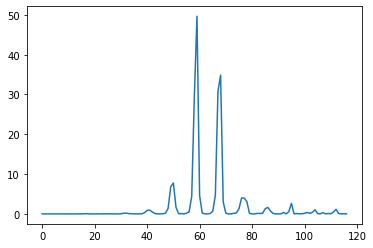

In [10]:
img, gx, gy, ret = train_set[random.randint(0, 40000)]
img = img.unsqueeze(0)
preds = model(img, True).squeeze().view(-1, 13*9)
preds = preds.cpu().detach().numpy()
plt.plot(preds[4,:])

35


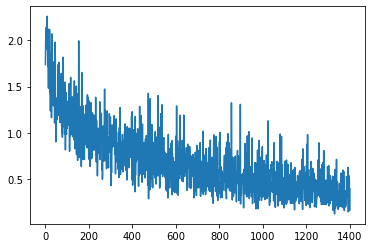

In [78]:
import matplotlib.pyplot as plt
import json

data = {}
with open('D:/projects/GestureRecognition/src/Model/hand_bbox_data.json', 'r') as f:
    data = json.load(f)
print(len(data['all_loss']))

def all_loss(i):
    loss = []
    for e in data['all_loss'][i:]:
        loss = loss + e
    return loss

plt.plot(all_loss(-7))

In [30]:
import torchvision
import torchvision.transforms as transforms
import torch as T
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import csv
import os
import operator
from PIL import Image
from PIL import ImageDraw
import random

# device = T.device("cuda:0" if T.cuda.is_available() else "cpu")

class HandPoseDataset(T.utils.data.Dataset):
    def __init__(self, csv_pose_path, images_path, device, stride=20, transform=None):
        self.images_path = images_path
        self.csv_pose_data = pd.read_csv(csv_pose_path)
        self.transform = transform
        self.device = device
        self.img_size = [480, 640]
        self.stride = stride

    def __len__(self):
        return 130240 - 32560

    def get_grid_dim(self):
        return [self.img_size[1] * self.scaling_factor // self.stride, self.img_size[0] * self.scaling_factor // self.stride]

    def __getitem__(self, i):
        img_name = self.images_path + '{:08d}'.format(i + 32560) + '.jpg'
        image = Image.open(img_name)
        pose_data = np.array(self.csv_pose_data.iloc[i % 32560, :])
        pose = []
        for k in [0, 3]:
            for i in range(1, 6):
                for j in range(2):
                    pose.append(pose_data[(4 * i - k) * 2 + j])
        dpose = pose.copy()
        dimage = image
        minx = min(pose[0::2]) - 20
        maxx = max(pose[0::2]) + 20
        miny = min(pose[1::2]) - 20
        maxy = max(pose[1::2]) + 20
        box = [minx, miny, maxx - minx, maxy - miny]
        dbox = box.copy()
        width, height = image.size
        side_length = max(box[2:])
        corner = box[:2]
        if box[2] > box[3]:
            corner[1] -= (box[2] - box[3]) / 2
        else:
            corner[0] -= (box[3] - box[2]) / 2
        box[0] = corner[0]
        box[1] = corner[1]
        box[2] = box[3] = side_length
        size = 300
        for i in range(0, len(pose), 2):
            pose[i] -= corner[0]
            pose[i] *= size / side_length
            pose[i + 1] -= corner[1]
            pose[i + 1] *= size / side_length
        image = transforms.functional.resized_crop(image, int(corner[1]), int(corner[0]), int(side_length), int(side_length), (size, size))
        # arranging pose data in format : [horizontal grid box, vertical grid box, class id, x offset, y offset]
        return [dimage, image], [dpose, pose], [dbox, box]
        pose = T.tensor([[
            pose[i] // self.stride,
            pose[i + 1] // self.stride,
            i // 2,
            (pose[i] - pose[i] // self.stride) * 100,
            (pose[i + 1] - pose[i + 1] // self.stride) * 100
            ] for i in range(0, len(pose), 2)]).to(self.device)

34645
tensor(0.0032, device='cuda:0', dtype=torch.float64)
tensor(0., device='cuda:0', dtype=torch.float64)
tensor(0.0032, device='cuda:0', dtype=torch.float64)
tensor(0., device='cuda:0', dtype=torch.float64)
tensor(0.0032, device='cuda:0', dtype=torch.float64)
tensor(0., device='cuda:0', dtype=torch.float64)
tensor(0.0032, device='cuda:0', dtype=torch.float64)
tensor(0., device='cuda:0', dtype=torch.float64)
tensor(0.0032, device='cuda:0', dtype=torch.float64)
tensor(0., device='cuda:0', dtype=torch.float64)
tensor(0.0032, device='cuda:0', dtype=torch.float64)
tensor(0., device='cuda:0', dtype=torch.float64)
tensor(0.0032, device='cuda:0', dtype=torch.float64)
tensor(2.4234e-238, device='cuda:0', dtype=torch.float64)
tensor(0.0032, device='cuda:0', dtype=torch.float64)
tensor(3.3679e-219, device='cuda:0', dtype=torch.float64)
tensor(0.0032, device='cuda:0', dtype=torch.float64)
tensor(1.3739e-251, device='cuda:0', dtype=torch.float64)
tensor(0.0032, device='cuda:0', dtype=torch.float

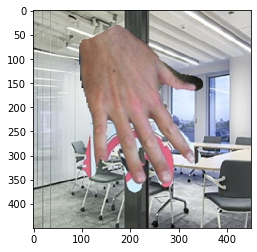

In [1]:
import matplotlib.patches as patches
import Datasets.HandPoseDataset as HPD
import torch as T
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import random

device = T.device("cuda:0" if T.cuda.is_available() else "cpu")
scales = [1.5, 1.0, 0.75, 0.5]
data_set = HPD.HandPoseDatasetHPD(HPD.PATHS['hpd_pose_data'], HPD.PATHS['hpd_images'], [58, 39, 29, 20], device)
ind = 34645 #random.randrange(len(data_set))
print(ind)
images, heatmaps = data_set[ind]
imgs, htmps = [], []
for s, scale in enumerate(scales):
    imgs.append(T.zeros(3, int(300 * scale), int(300 * scale)))
    imgs[-1] = images[s][:, :, :]
    htmps.append(T.zeros(10, int(300 * scale), int(300 * scale)))
    htmps[-1] = heatmaps[s]
hmp = T.zeros(58, 58)
for i in range(10):
    hmp += htmps[0][i]
print(hmp[:,:].min())
plt.imshow(transforms.ToPILImage()(imgs[0].cpu()))
plt.show()

torch.Size([3, 224, 224]) torch.Size([224, 224])


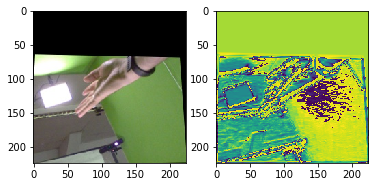

In [18]:
from Datasets.HandPoseDataset import testing2
import Nets.InceptionResnet.GenericNet as IG
import torch as T
import torchvision.transforms as transforms

img, msk = testing2()
device = T.device("cuda:0" if T.cuda.is_available() else "cpu")
net = IG.GenericNet(IG.PATHS['MASKCNN'], device).to(device)
fig, ax = plt.subplots(nrows=1, ncols=2)
imgs = [img, msk, net(img.unsqueeze(0)).squeeze()]
print(imgs[0].shape, imgs[1].shape)
for i, axes in enumerate(ax):
    axes.imshow(transforms.Compose([transforms.ToPILImage()])(imgs[i].cpu()))

30640
torch.Size([1, 1, 15, 20])
tensor(3.1835, device='cuda:0', grad_fn=<MaxBackward1>)
[4, 10]
320.0 128.0


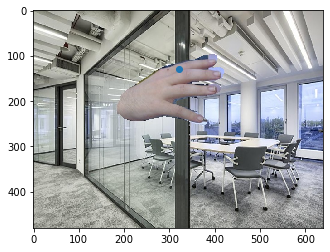

In [17]:
import Datasets.HandPoseDataset as HPD
import Nets.GenericNet as GN
import random
import torch as T
import matplotlib.pyplot as plt
import torchvision.transforms as transforms


device = T.device("cuda:0" if T.cuda.is_available() else "cpu")
ds = HPD.HandBoundingBoxDataset(HPD.PATHS['hpd_bbox_data'], HPD.PATHS['hpd_images'], [1.0], device)
model_name = 'HANDDETECTOR'

net = GN.GenericNet(GN.PATHS[model_name], device).to(device)
net.load_state_dict(T.load(HPD.WEIGHT_PATHS[model_name]))

ind = random.randrange(len(ds))
print(ind)
img, coords = ds[ind]
pred = net(img[0].unsqueeze(0))[-1]
print(pred.shape)
print(pred[:,:,:].max())
max_pos = None
m = 0
for i in range(pred.size(2)):
    for j in range(pred.size(3)):
        if pred[0,0,i,j] > m:
            m = pred[0,0,i,j]
            max_pos = [i, j]
print(max_pos)
plt.imshow(transforms.ToPILImage()(img[0].cpu()))
x, y = 640 * max_pos[1] / pred.size(3), 480 * max_pos[0] / pred.size(2)
print(x, y)
plt.scatter([640 * max_pos[1] / pred.size(3)], [480 * max_pos[0] / pred.size(2)])